In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
covid_data = pd.read_json("https://covid.ourworldindata.org/data/owid-covid-data.json")

In [4]:
covid_data.head()

,ABW,AFG,AGO,AIA,ALB,AND,ARE,ARG,ARM,ATG,AUS,AUT,AZE,BDI,BEL,BEN,BES,BFA,BGD,BGR,BHR,BHS,BIH,BLR,BLZ,BMU,BOL,BRA,BRB,BRN,BTN,BWA,CAF,CAN,CHE,CHL,CHN,CIV,CMR,COD,...,SOM,SRB,SSD,STP,SUR,SVK,SVN,SWE,SWZ,SXM,SYC,SYR,TCA,TCD,TGO,THA,TJK,TLS,TTO,TUN,TUR,TWN,TZA,UGA,UKR,URY,USA,UZB,VAT,VCT,VEN,VGB,VIR,VNM,OWID_KOS,YEM,ZAF,ZMB,ZWE,OWID_WRL
continent,North America,Asia,Africa,North America,Europe,Europe,Asia,South America,Asia,North America,Oceania,Europe,Asia,Africa,Europe,Africa,North America,Africa,Asia,Europe,Asia,North America,Europe,Europe,North America,North America,South America,South America,North America,Asia,Asia,Africa,Africa,North America,Europe,South America,Asia,Africa,Africa,Africa,...,Africa,Europe,Africa,Africa,South America,Europe,Europe,Europe,Africa,North America,Africa,Asia,North America,Africa,Africa,Asia,Asia,Asia,North America,Africa,Asia,Asia,Africa,Africa,Europe,South America,North America,Asia,Europe,North America,South America,North America,North America,Asia,Europe,Asia,Africa,Africa,Africa,NaN
location,Aruba,Afghanistan,Angola,Anguilla,Albania,Andorra,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,Azerbaijan,Burundi,Belgium,Benin,Bonaire Sint Eustatius and Saba,Burkina Faso,Bangladesh,Bulgaria,Bahrain,Bahamas,Bosnia and Herzegovina,Belarus,Belize,Bermuda,Bolivia,Brazil,Barbados,Brunei,Bhutan,Botswana,Central African Republic,Canada,Switzerland,Chile,China,Cote d'Ivoire,Cameroon,Democratic Republic of Congo,...,Somalia,Serbia,South Sudan,Sao Tome and Principe,Suriname,Slovakia,Slovenia,Sweden,Swaziland,Sint Maarten (Dutch part),Seychelles,Syria,Turks and Caicos Islands,Chad,Togo,Thailand,Tajikistan,Timor,Trinidad and Tobago,Tunisia,Turkey,Taiwan,Tanzania,Uganda,Ukraine,Uruguay,United States,Uzbekistan,Vatican,Saint Vincent and the Grenadines,Venezuela,British Virgin Islands,United States Virgin Islands,Vietnam,Kosovo,Yemen,South Africa,Zambia,Zimbabwe,World
population,106766,3.89283e+07,3.28663e+07,15002,2.8778e+06,77265,9.8904e+06,4.51958e+07,2.96323e+06,97928,2.54999e+07,9.0064e+06,1.01392e+07,1.18908e+07,1.15896e+07,1.21232e+07,26221,2.09033e+07,1.64689e+08,6.94844e+06,1.70158e+06,393248,3.28082e+06,9.44932e+06,397621,62273,1.1673e+07,2.12559e+08,287371,437483,771612,2.35162e+06,4.82976e+06,3.77422e+07,8.65462e+06,1.91162e+07,1.43932e+09,2.63783e+07,2.65459e+07,8.95614e+07,...,1.58932e+07,6.8046e+06,1.11937e+07,219161,586634,5.45964e+06,2.07893e+06,1.00993e+07,1.16016e+06,42882,98340,1.75007e+07,38718,1.64259e+07,8.27874e+06,6.98e+07,9.53764e+06,1.31844e+06,1.39949e+06,1.18186e+07,8.43391e+07,2.38168e+07,5.97342e+07,4.5741e+07,4.37338e+07,3.47373e+06,3.31003e+08,3.34692e+07,809,110947,2.84359e+07,30237,104423,9.73386e+07,1.93277e+06,2.9826e+07,5.93087e+07,1.8384e+07,1.48629e+07,7.7948e+09
population_density,584.8,54.422,23.89,NaN,104.871,163.755,112.442,16.177,102.931,231.845,3.202,106.749,119.309,423.062,375.564,99.11,NaN,70.151,1265.04,65.18,1935.91,39.497,68.496,46.858,16.426,1308.82,10.202,25.04,664.463,81.347,21.188,4.044,7.479,4.037,214.243,24.282,147.674,76.399,50.885,35.879,...,23.5,80.291,NaN,212.841,3.612,113.128,102.619,24.718,79.492,1209.09,208.354,NaN,37.312,11.833,143.366,135.132,64.281,87.176,266.886,74.228,104.914,NaN,64.699,213.759,77.39,19.751,35.608,76.134,NaN,281.787,36.253,207.973,306.48,308.127,168.155,53.508,46.754,22.995,42.729,58.045
median_age,41.2,18.6,16.8,NaN,38,NaN,34,31.9,35.7,32.1,37.9,44.4,32.4,17.5,41.8,18.8,NaN,17.6,27.5,44.7,32.4,34.3,42.5,40.3,25,NaN,25.4,33.5,39.8,32.4,28.6,25.8,18.3,41.4,43.1,35.4,38.7,18.7,18.8,17,...,16.8,41.2,19.2,18.7,29.6,41.2,44.5,41,21.5,NaN,36.2,21.7,NaN,16.7,19.4,40.1,23.3,18,36.2,32.7,31.6,42.2,17.7,16.4,41.4,35.6,38.3,28.2,NaN,31.8,29,NaN,42.2,32.6,NaN,20.3,27.3,17.7,19.6,30.9


In [5]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, continent to male_smokers
Columns: 212 entries, ABW to OWID_WRL
dtypes: object(212)
memory usage: 30.6+ KB


In [7]:
covid_data.columns

Index(['ABW', 'AFG', 'AGO', 'AIA', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ATG',
       ...
       'VEN', 'VGB', 'VIR', 'VNM', 'OWID_KOS', 'YEM', 'ZAF', 'ZMB', 'ZWE',
       'OWID_WRL'],
      dtype='object', length=212)

In [9]:
covid_data.index

Index(['continent', 'location', 'population', 'population_density',
       'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita',
       'diabetes_prevalence', 'life_expectancy', 'data',
       'cardiovasc_death_rate', 'handwashing_facilities',
       'hospital_beds_per_thousand', 'human_development_index',
       'extreme_poverty', 'female_smokers', 'male_smokers'],
      dtype='object')

In [10]:
nepal_data_df = covid_data.loc[:,["NPL"]]

In [12]:
nepal_data_df

,NPL
continent,Asia
location,Nepal
population,2.91368e+07
population_density,204.43
median_age,25
aged_65_older,5.809
aged_70_older,3.212
gdp_per_capita,2442.8
diabetes_prevalence,7.26
life_expectancy,70.78


In [14]:
nepal_everyday_data = pd.DataFrame(nepal_data_df['NPL']['data'])

In [16]:
nepal_everyday_data

,date,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,stringency_index,new_cases_smoothed,new_deaths_smoothed,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,total_cases,total_cases_per_million,total_tests,total_tests_per_thousand,tests_units,new_tests,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_deaths,total_deaths_per_million
0,2019-12-31,0.0,0.0,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,0.0,0.0,0.000,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,0.0,0.0,0.000,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-03,0.0,0.0,0.000,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-04,0.0,0.0,0.000,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,2020-10-12,2071.0,22.0,71.078,0.755,NaN,2990.286,14.429,102.629,0.495,107755.0,3698.243,1191514.0,40.894,tests performed,14530.0,0.499,14755.0,0.506,0.203,4.934,636.0,21.828
287,2020-10-13,4047.0,9.0,138.896,0.309,NaN,3219.857,13.000,110.508,0.446,111802.0,3837.140,1207091.0,41.428,tests performed,15577.0,0.535,15402.0,0.529,0.209,4.783,645.0,22.137
288,2020-10-14,3556.0,18.0,122.045,0.618,NaN,3506.286,14.286,120.339,0.490,115358.0,3959.185,1221038.0,41.907,tests performed,13947.0,0.479,15365.0,0.527,0.228,4.382,663.0,22.755
289,2020-10-15,2638.0,12.0,90.538,0.412,NaN,3391.857,13.857,116.411,0.476,117996.0,4049.723,1237636.0,42.477,tests performed,16598.0,0.570,15097.0,0.518,0.225,4.451,675.0,23.167


In [18]:
nepal_everyday_data.isna().any()

date                               False
new_cases                           True
new_deaths                          True
new_cases_per_million               True
new_deaths_per_million              True
stringency_index                    True
new_cases_smoothed                  True
new_deaths_smoothed                 True
new_cases_smoothed_per_million      True
new_deaths_smoothed_per_million     True
total_cases                         True
total_cases_per_million             True
total_tests                         True
total_tests_per_thousand            True
tests_units                         True
new_tests                           True
new_tests_per_thousand              True
new_tests_smoothed                  True
new_tests_smoothed_per_thousand     True
positive_rate                       True
tests_per_case                      True
total_deaths                        True
total_deaths_per_million            True
dtype: bool

In [20]:
nepal_everyday_data.shape

(291, 23)

In [24]:
mean_fill_data = nepal_everyday_data.fillna(value=nepal_everyday_data.mean())

In [27]:
mean_fill_data.isna().any()

date                               False
new_cases                          False
new_deaths                         False
new_cases_per_million              False
new_deaths_per_million             False
stringency_index                   False
new_cases_smoothed                 False
new_deaths_smoothed                False
new_cases_smoothed_per_million     False
new_deaths_smoothed_per_million    False
total_cases                        False
total_cases_per_million            False
total_tests                        False
total_tests_per_thousand           False
tests_units                         True
new_tests                          False
new_tests_per_thousand             False
new_tests_smoothed                 False
new_tests_smoothed_per_thousand    False
positive_rate                      False
tests_per_case                     False
total_deaths                       False
total_deaths_per_million           False
dtype: bool

In [28]:
mean_fill_data

,date,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,stringency_index,new_cases_smoothed,new_deaths_smoothed,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,total_cases,total_cases_per_million,total_tests,total_tests_per_thousand,tests_units,new_tests,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_deaths,total_deaths_per_million
0,2019-12-31,0.0,0.0,0.000,0.000,67.014468,391.486726,2.269168,13.436151,0.077926,19193.541502,658.738613,3.117061e+05,10.698017,NaN,5500.146667,0.18872,4674.513725,0.1604,0.046698,83.847675,167.03268,5.732719
1,2020-01-01,0.0,0.0,0.000,0.000,0.000000,391.486726,2.269168,13.436151,0.077926,19193.541502,658.738613,3.117061e+05,10.698017,NaN,5500.146667,0.18872,4674.513725,0.1604,0.046698,83.847675,167.03268,5.732719
2,2020-01-02,0.0,0.0,0.000,0.000,0.000000,391.486726,2.269168,13.436151,0.077926,19193.541502,658.738613,3.117061e+05,10.698017,NaN,5500.146667,0.18872,4674.513725,0.1604,0.046698,83.847675,167.03268,5.732719
3,2020-01-03,0.0,0.0,0.000,0.000,0.000000,391.486726,2.269168,13.436151,0.077926,19193.541502,658.738613,3.117061e+05,10.698017,NaN,5500.146667,0.18872,4674.513725,0.1604,0.046698,83.847675,167.03268,5.732719
4,2020-01-04,0.0,0.0,0.000,0.000,0.000000,391.486726,2.269168,13.436151,0.077926,19193.541502,658.738613,3.117061e+05,10.698017,NaN,5500.146667,0.18872,4674.513725,0.1604,0.046698,83.847675,167.03268,5.732719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,2020-10-12,2071.0,22.0,71.078,0.755,67.014468,2990.286000,14.429000,102.629000,0.495000,107755.000000,3698.243000,1.191514e+06,40.894000,tests performed,14530.000000,0.49900,14755.000000,0.5060,0.203000,4.934000,636.00000,21.828000
287,2020-10-13,4047.0,9.0,138.896,0.309,67.014468,3219.857000,13.000000,110.508000,0.446000,111802.000000,3837.140000,1.207091e+06,41.428000,tests performed,15577.000000,0.53500,15402.000000,0.5290,0.209000,4.783000,645.00000,22.137000
288,2020-10-14,3556.0,18.0,122.045,0.618,67.014468,3506.286000,14.286000,120.339000,0.490000,115358.000000,3959.185000,1.221038e+06,41.907000,tests performed,13947.000000,0.47900,15365.000000,0.5270,0.228000,4.382000,663.00000,22.755000
289,2020-10-15,2638.0,12.0,90.538,0.412,67.014468,3391.857000,13.857000,116.411000,0.476000,117996.000000,4049.723000,1.237636e+06,42.477000,tests performed,16598.000000,0.57000,15097.000000,0.5180,0.225000,4.451000,675.00000,23.167000


In [29]:
mean_fill_data.dropna(axis=1,inplace=True)

In [30]:
mean_fill_data

,date,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,stringency_index,new_cases_smoothed,new_deaths_smoothed,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,total_cases,total_cases_per_million,total_tests,total_tests_per_thousand,new_tests,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_deaths,total_deaths_per_million
0,2019-12-31,0.0,0.0,0.000,0.000,67.014468,391.486726,2.269168,13.436151,0.077926,19193.541502,658.738613,3.117061e+05,10.698017,5500.146667,0.18872,4674.513725,0.1604,0.046698,83.847675,167.03268,5.732719
1,2020-01-01,0.0,0.0,0.000,0.000,0.000000,391.486726,2.269168,13.436151,0.077926,19193.541502,658.738613,3.117061e+05,10.698017,5500.146667,0.18872,4674.513725,0.1604,0.046698,83.847675,167.03268,5.732719
2,2020-01-02,0.0,0.0,0.000,0.000,0.000000,391.486726,2.269168,13.436151,0.077926,19193.541502,658.738613,3.117061e+05,10.698017,5500.146667,0.18872,4674.513725,0.1604,0.046698,83.847675,167.03268,5.732719
3,2020-01-03,0.0,0.0,0.000,0.000,0.000000,391.486726,2.269168,13.436151,0.077926,19193.541502,658.738613,3.117061e+05,10.698017,5500.146667,0.18872,4674.513725,0.1604,0.046698,83.847675,167.03268,5.732719
4,2020-01-04,0.0,0.0,0.000,0.000,0.000000,391.486726,2.269168,13.436151,0.077926,19193.541502,658.738613,3.117061e+05,10.698017,5500.146667,0.18872,4674.513725,0.1604,0.046698,83.847675,167.03268,5.732719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,2020-10-12,2071.0,22.0,71.078,0.755,67.014468,2990.286000,14.429000,102.629000,0.495000,107755.000000,3698.243000,1.191514e+06,40.894000,14530.000000,0.49900,14755.000000,0.5060,0.203000,4.934000,636.00000,21.828000
287,2020-10-13,4047.0,9.0,138.896,0.309,67.014468,3219.857000,13.000000,110.508000,0.446000,111802.000000,3837.140000,1.207091e+06,41.428000,15577.000000,0.53500,15402.000000,0.5290,0.209000,4.783000,645.00000,22.137000
288,2020-10-14,3556.0,18.0,122.045,0.618,67.014468,3506.286000,14.286000,120.339000,0.490000,115358.000000,3959.185000,1.221038e+06,41.907000,13947.000000,0.47900,15365.000000,0.5270,0.228000,4.382000,663.00000,22.755000
289,2020-10-15,2638.0,12.0,90.538,0.412,67.014468,3391.857000,13.857000,116.411000,0.476000,117996.000000,4049.723000,1.237636e+06,42.477000,16598.000000,0.57000,15097.000000,0.5180,0.225000,4.451000,675.00000,23.167000


In [31]:
mean_fill_data['date'] = pd.to_datetime(mean_fill_data['date'],format="%Y-%m-%d")

In [33]:
mean_fill_data.dtypes

date                               datetime64[ns]
new_cases                                 float64
new_deaths                                float64
new_cases_per_million                     float64
new_deaths_per_million                    float64
stringency_index                          float64
new_cases_smoothed                        float64
new_deaths_smoothed                       float64
new_cases_smoothed_per_million            float64
new_deaths_smoothed_per_million           float64
total_cases                               float64
total_cases_per_million                   float64
total_tests                               float64
total_tests_per_thousand                  float64
new_tests                                 float64
new_tests_per_thousand                    float64
new_tests_smoothed                        float64
new_tests_smoothed_per_thousand           float64
positive_rate                             float64
tests_per_case                            float64


In [34]:
columns = ['date','new_cases','new_deaths','new_tests','total_cases','total_deaths','total_tests']

In [35]:
mean_fill_data[columns]

,date,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests
0,2019-12-31,0.0,0.0,5500.146667,19193.541502,167.03268,3.117061e+05
1,2020-01-01,0.0,0.0,5500.146667,19193.541502,167.03268,3.117061e+05
2,2020-01-02,0.0,0.0,5500.146667,19193.541502,167.03268,3.117061e+05
3,2020-01-03,0.0,0.0,5500.146667,19193.541502,167.03268,3.117061e+05
4,2020-01-04,0.0,0.0,5500.146667,19193.541502,167.03268,3.117061e+05
...,...,...,...,...,...,...,...
286,2020-10-12,2071.0,22.0,14530.000000,107755.000000,636.00000,1.191514e+06
287,2020-10-13,4047.0,9.0,15577.000000,111802.000000,645.00000,1.207091e+06
288,2020-10-14,3556.0,18.0,13947.000000,115358.000000,663.00000,1.221038e+06
289,2020-10-15,2638.0,12.0,16598.000000,117996.000000,675.00000,1.237636e+06


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


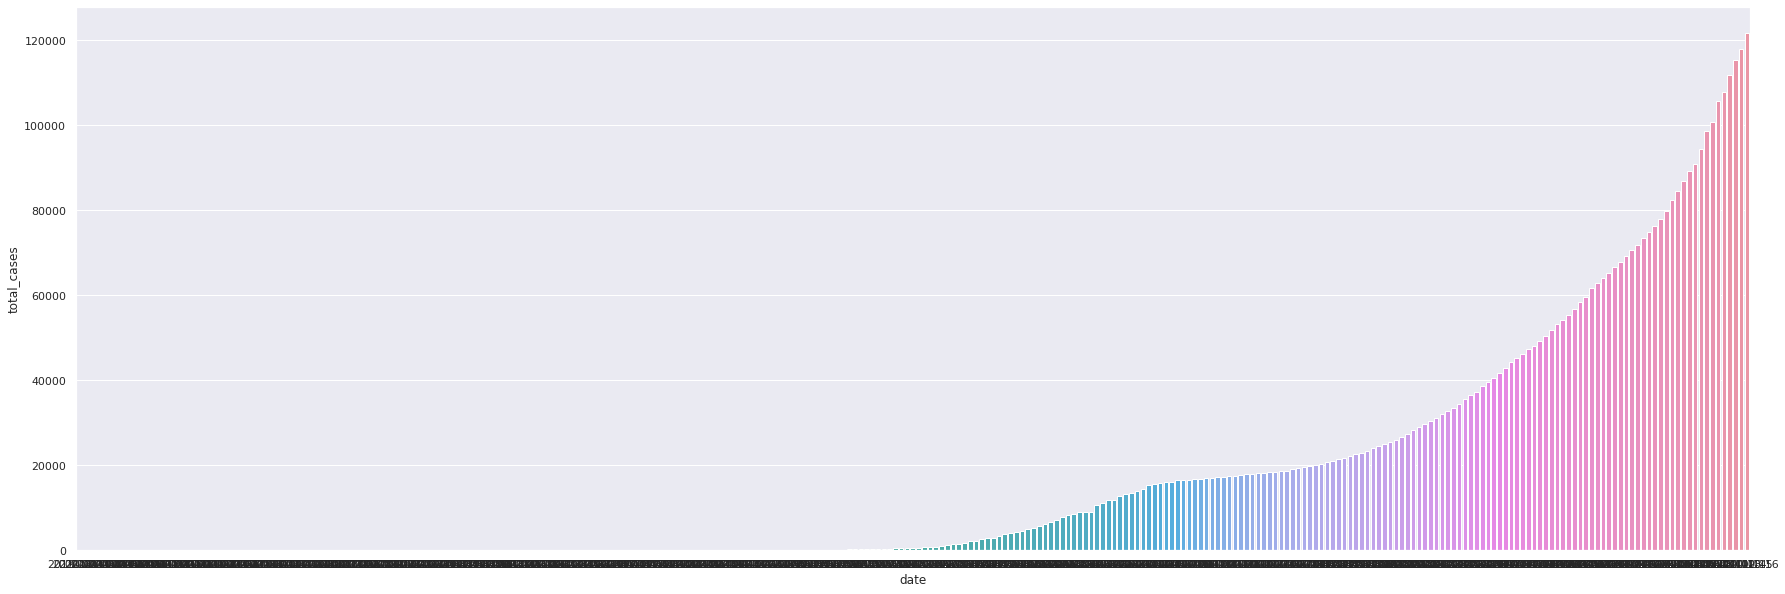

In [49]:
# X = mean_fill_data.loc[:,'date']
# y = mean_fill_data.loc[:,'total_cases']
sns.set(rc={'figure.figsize':(30,10)})
sns.barplot('date','total_cases',data=nepal_everyday_data)

In [ ]:
#we can see the number of cases increasing day by day

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


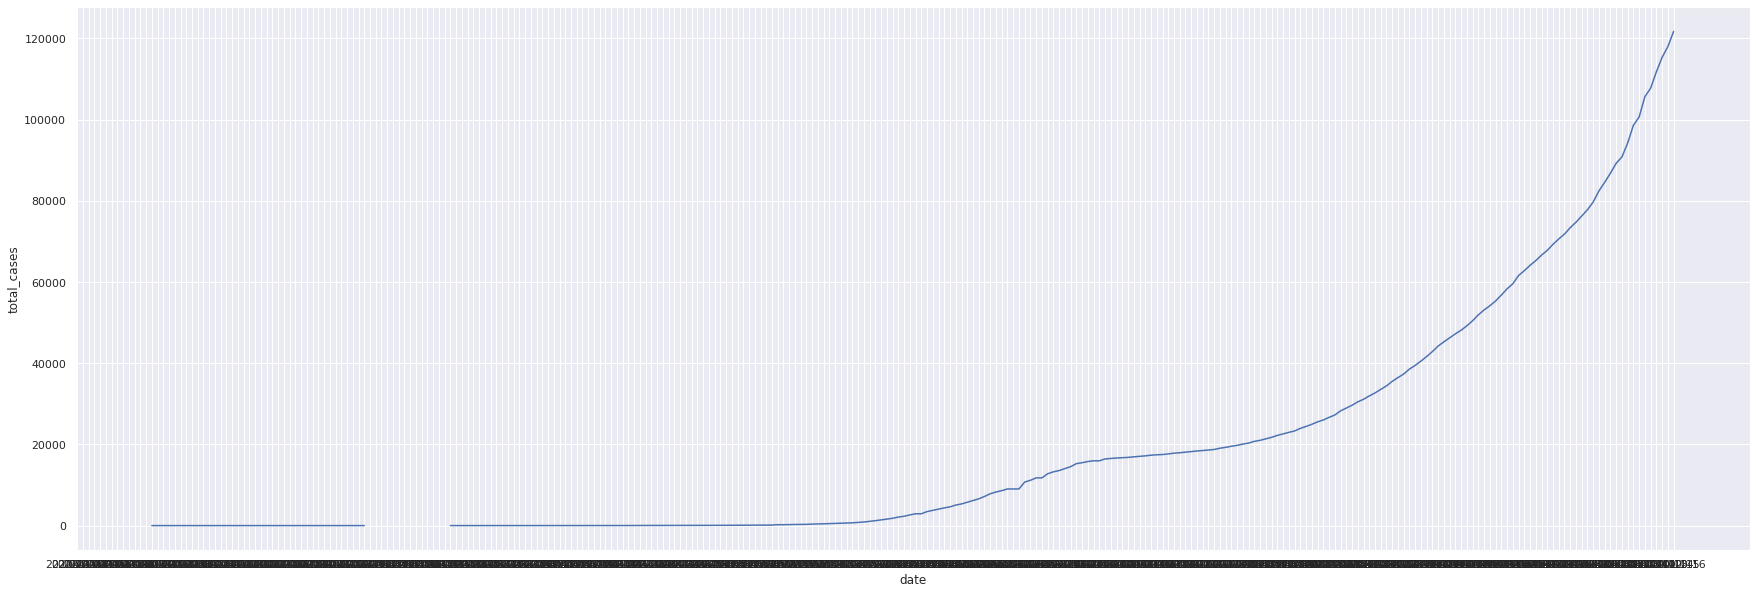

In [51]:
sns.lineplot('date','total_cases',data=nepal_everyday_data)

In [52]:
mean_fill_data.corr()

,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,stringency_index,new_cases_smoothed,new_deaths_smoothed,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,total_cases,total_cases_per_million,total_tests,total_tests_per_thousand,new_tests,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_deaths,total_deaths_per_million
new_cases,1.000000,0.817300,1.000000,0.817264,0.144475,0.941092,0.858620,0.941091,0.858671,0.904374,0.904374,0.798179,0.798178,0.709940,0.710180,0.740122,0.740211,0.820992,-0.258790,0.760750,0.760748
new_deaths,0.817300,1.000000,0.817299,0.999999,0.139874,0.850049,0.915271,0.850049,0.915297,0.853637,0.853637,0.813227,0.813227,0.740623,0.740711,0.772599,0.772694,0.728419,-0.256357,0.713206,0.713207
new_cases_per_million,1.000000,0.817299,1.000000,0.817263,0.144476,0.941092,0.858619,0.941091,0.858670,0.904373,0.904373,0.798178,0.798177,0.709939,0.710179,0.740121,0.740210,0.820991,-0.258789,0.760750,0.760748
new_deaths_per_million,0.817264,0.999999,0.817263,1.000000,0.139777,0.850031,0.915314,0.850030,0.915340,0.853643,0.853643,0.813281,0.813281,0.740672,0.740759,0.772633,0.772728,0.728378,-0.256305,0.713302,0.713303
stringency_index,0.144475,0.139874,0.144476,0.139777,1.000000,0.171169,0.163491,0.171169,0.163772,0.046499,0.046499,0.011268,0.011268,-0.009983,-0.010013,0.182668,0.182699,0.167445,0.081408,-0.144652,-0.144652
new_cases_smoothed,0.941092,0.850049,0.941092,0.850031,0.171169,1.000000,0.922903,1.000000,0.922934,0.946022,0.946022,0.851915,0.851915,0.757975,0.758200,0.806348,0.806371,0.892196,-0.274699,0.791304,0.791303
new_deaths_smoothed,0.858620,0.915271,0.858619,0.915314,0.163491,0.922903,1.000000,0.922903,0.999998,0.915407,0.915407,0.898140,0.898140,0.813324,0.813400,0.862077,0.862172,0.819400,-0.276373,0.771758,0.771758
new_cases_smoothed_per_million,0.941091,0.850049,0.941091,0.850030,0.171169,1.000000,0.922903,1.000000,0.922934,0.946022,0.946022,0.851915,0.851915,0.757975,0.758200,0.806347,0.806370,0.892196,-0.274698,0.791304,0.791304
new_deaths_smoothed_per_million,0.858671,0.915297,0.858670,0.915340,0.163772,0.922934,0.999998,0.922934,1.000000,0.915417,0.915417,0.898132,0.898133,0.813304,0.813380,0.862158,0.862253,0.819488,-0.276555,0.771506,0.771507
total_cases,0.904374,0.853637,0.904373,0.853643,0.046499,0.946022,0.915407,0.946022,0.915417,1.000000,1.000000,0.919078,0.919078,0.793470,0.793635,0.821885,0.821925,0.859044,-0.295240,0.823266,0.823266


In [53]:
zero_fill_data = nepal_everyday_data.fillna(value=0)

In [55]:
zero_fill_data

,date,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,stringency_index,new_cases_smoothed,new_deaths_smoothed,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,total_cases,total_cases_per_million,total_tests,total_tests_per_thousand,tests_units,new_tests,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_deaths,total_deaths_per_million
0,2019-12-31,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.000
1,2020-01-01,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.000
2,2020-01-02,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.000
3,2020-01-03,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.000
4,2020-01-04,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,2020-10-12,2071.0,22.0,71.078,0.755,0.0,2990.286,14.429,102.629,0.495,107755.0,3698.243,1191514.0,40.894,tests performed,14530.0,0.499,14755.0,0.506,0.203,4.934,636.0,21.828
287,2020-10-13,4047.0,9.0,138.896,0.309,0.0,3219.857,13.000,110.508,0.446,111802.0,3837.140,1207091.0,41.428,tests performed,15577.0,0.535,15402.0,0.529,0.209,4.783,645.0,22.137
288,2020-10-14,3556.0,18.0,122.045,0.618,0.0,3506.286,14.286,120.339,0.490,115358.0,3959.185,1221038.0,41.907,tests performed,13947.0,0.479,15365.0,0.527,0.228,4.382,663.0,22.755
289,2020-10-15,2638.0,12.0,90.538,0.412,0.0,3391.857,13.857,116.411,0.476,117996.0,4049.723,1237636.0,42.477,tests performed,16598.0,0.570,15097.0,0.518,0.225,4.451,675.0,23.167


In [61]:
zero_fill_data['date'] = pd.to_datetime(mean_fill_data['date'],format="%Y-%m-%d")


In [62]:
zero_fill_data['date'] = zero_fill_data['date'].map(dt.datetime.toordinal)

In [63]:
zero_fill_data.head()

,date,new_cases,new_deaths,new_cases_per_million,new_deaths_per_million,stringency_index,new_cases_smoothed,new_deaths_smoothed,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,total_cases,total_cases_per_million,total_tests,total_tests_per_thousand,tests_units,new_tests,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_deaths,total_deaths_per_million
0,737424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,737425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,737426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,737427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,737428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [68]:
X = zero_fill_data['date']
y = zero_fill_data['total_cases']

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [70]:
lr = LinearRegression()

In [76]:
X_train  = np.array(X_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1) 
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
lr.coef_

array([[248.0402454]])

In [78]:
lr.intercept_

array([-1.82930582e+08])

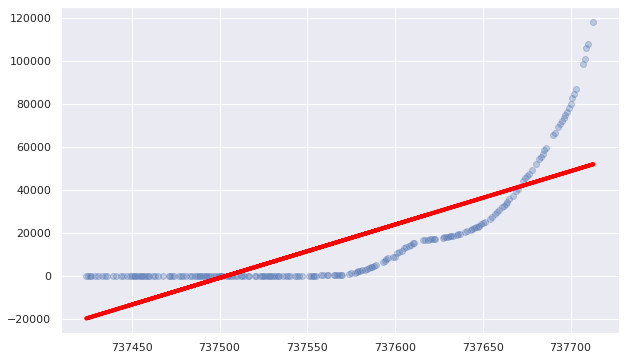

In [81]:
plt.figure(figsize=(10,6))
plt.scatter(X_train,y_train,alpha=0.3)
plt.plot(X_train,lr.predict(X_train),color="red",linewidth=4)

In [86]:
X_test  = np.array(X_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)


In [87]:
predicted = lr.predict(X_test)
expected = y_test

In [88]:
print("RMS: %r " % np.sqrt(np.mean((predicted - expected) ** 2)))

RMS: 18377.47002996268 
